In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_test.shape

(10000,)

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train=X_train/255.0
X_test=X_test/255.0

<Figure size 432x288 with 0 Axes>

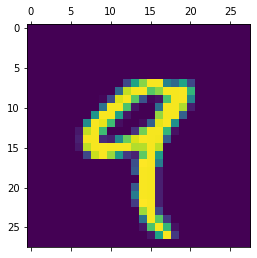

In [8]:
plt.figure()
plt.matshow(X_train[4])

In [9]:
y_train[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train_flattened= X_train.reshape(len(X_train),28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_test_flattened= X_test.reshape(len(X_test),28*28)

In [14]:
X_test_flattened.shape

(10000, 784)

In [28]:
X_train_flattened[4]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [29]:
model= keras.Sequential([keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')])

In [30]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )

In [31]:
model.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 885us/step - loss: 0.4693 - accuracy: 0.8761
Epoch 2/10
1875/1875 [==============================] - 2s 866us/step - loss: 0.3032 - accuracy: 0.9153
Epoch 3/10
1875/1875 [==============================] - 2s 873us/step - loss: 0.2829 - accuracy: 0.9205
Epoch 4/10
1875/1875 [==============================] - 2s 875us/step - loss: 0.2729 - accuracy: 0.9241
Epoch 5/10
1875/1875 [==============================] - 2s 879us/step - loss: 0.2662 - accuracy: 0.9252
Epoch 6/10
1875/1875 [==============================] - 2s 892us/step - loss: 0.2616 - accuracy: 0.9276
Epoch 7/10
1875/1875 [==============================] - 2s 872us/step - loss: 0.2581 - accuracy: 0.9287
Epoch 8/10
1875/1875 [==============================] - 2s 920us/step - loss: 0.2551 - accuracy: 0.9293
Epoch 9/10
1875/1875 [==============================] - 2s 906us/step - loss: 0.2528 - accuracy: 0.9298
Epoch 10/10
1875/1875 [==============================] - 2s 876u

In [32]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 801us/step - loss: 0.2670 - accuracy: 0.9263


[0.26703715324401855, 0.9262999892234802]

In [33]:
y_predicted=model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [34]:
y_predicted

array([[7.0421221e-03, 8.4074099e-09, 1.2601267e-02, ..., 9.9985826e-01,
        8.2935773e-02, 5.6284392e-01],
       [4.8805246e-01, 3.5993662e-03, 9.9969453e-01, ..., 2.4633910e-15,
        7.5040363e-02, 3.2840486e-12],
       [2.0937480e-04, 9.9341393e-01, 7.1201098e-01, ..., 4.9087171e-02,
        3.2726026e-01, 3.3349391e-02],
       ...,
       [2.6457328e-06, 2.1312752e-07, 6.4293668e-04, ..., 1.8800579e-01,
        5.4138237e-01, 6.6303509e-01],
       [3.0263596e-05, 1.1105626e-05, 1.9172914e-05, ..., 1.2261367e-05,
        5.6942296e-01, 1.2011126e-05],
       [2.4322246e-03, 5.4288653e-12, 1.6849045e-01, ..., 3.1404837e-11,
        2.3057204e-05, 1.0360145e-08]], dtype=float32)

In [35]:
y_predicted[4]

array([8.0981597e-02, 5.9726176e-06, 1.4979117e-01, 2.0198578e-03,
       9.9074084e-01, 1.1398049e-02, 1.4687063e-01, 2.4730939e-01,
       2.3575880e-01, 6.6000831e-01], dtype=float32)

In [36]:
np.argmax(y_predicted[4])

4

In [37]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:4]

[7, 2, 1, 0]

In [38]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [39]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1107,    4,    2,    0,    1,    4,    2,   15,    0],
       [   7,    8,  929,   20,    8,    3,   12,    9,   33,    3],
       [   3,    0,   15,  933,    0,   20,    2,   10,   21,    6],
       [   1,    1,    5,    3,  922,    0,    9,    4,   11,   26],
       [  10,    1,    3,   36,    9,  786,   13,    6,   25,    3],
       [  13,    3,    8,    1,    7,   13,  910,    1,    2,    0],
       [   1,    6,   23,    9,    5,    1,    0,  957,    3,   23],
       [  10,    7,    6,   30,    9,   35,    8,   12,  850,    7],
       [  11,    7,    1,   14,   29,    8,    0,   32,    4,  903]])>